In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import (Input, Dense, Dropout, Activation,
                                     BatchNormalization, Flatten,
                                     Conv2D, MaxPooling2D,GlobalAveragePooling2D)
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
import tensorflow as tf

In [2]:
# import shutil

# nowpath = os.getcwd() #至當前的工作目錄
# try:   
#     shutil.rmtree(nowpath +'/testing_set/.ipynb_checkpoints') # 可以删除空目录，也可以删除含有文件或子目录的目录
# except:
#     pass
# try:   
#     shutil.rmtree(nowpath +'/training_set/training_set/yui/.ipynb_checkpoints')
# except:
#     pass
# try:   
#     shutil.rmtree(nowpath +'/training_set/training_set/risa/.ipynb_checkpoints')
# except:
#     pass
# try:   
#     shutil.rmtree(nowpath +'/training_set/training_set/rika/.ipynb_checkpoints')
# except:
#     pass
# try:   
#     shutil.rmtree(nowpath +'/training_set/training_set/neru/.ipynb_checkpoints')
# except:
#     pass
# try:   
#     shutil.rmtree(nowpath +'/training_set/training_set/akane/.ipynb_checkpoints')
# except:
#     pass


In [3]:
data_path = '.\\training_set'

x_data_list = []
y_data_list = []
for roots, dirs, files in os.walk(data_path):
    print(roots)
    #print('-----')
    print(dirs)
    #print('-----')
    print(files)
    if dirs == []:
        #print('null',dirs)
        for each in files:
            #print('every each:',each)
            if each.find('check') == -1:
                x_data_list.append(os.path.join(roots, each))
                y_data_list.append(roots.split("\\")[-1]) 

.\training_set
['akane', 'neru', 'rika', 'risa', 'yui']
[]
.\training_set\akane
[]
['000.png', '001.png', '002.png', '003.png', '004.png', '005.png', '006.png', '007.png', '008.png', '009.png', '010.png', '011.png', '012.png', '013.png', '014.png', '015.png', '016.png', '017.png', '018.png', '019.png', '020.png', '021.png', '022.png', '023.png', '024.png', '025.png', '026.png', '027.png', '028.png', '029.png', '030.png', '031.png', '032.png', '033.png', '034.png', '035.png', '036.png', '037.png', '038.png', '039.png', '040.png', '041.png', '042.png', '043.png', '044.png', '045.png', '046.png', '047.png', '048.png', '049.png', '050.png', '051.png', '052.png', '053.png', '054.png', '055.png', '056.png', '057.png', '058.png', '059.png', '060.png', '061.png', '062.png', '063.png', '064.png', '065.png', '066.png', '067.png', '068.png', '069.png', '070.png', '071.png', '072.png', '073.png', '074.png', '075.png', '076.png', '077.png', '078.png', '079.png', '080.png', '081.png', '082.png', '08

In [4]:
print(x_data_list[:5])
#print(y_data_list)

['.\\training_set\\akane\\000.png', '.\\training_set\\akane\\001.png', '.\\training_set\\akane\\002.png', '.\\training_set\\akane\\003.png', '.\\training_set\\akane\\004.png']


(224, 224, 3)


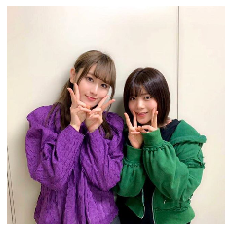

In [5]:
img_size = 224 
img = cv2.imread(x_data_list[8],1) # 1 BGR 0 灰階 -1 透明度  
img = img[:,:,::-1] #將 BGR 轉成 RGB
img = cv2.resize(img, (img_size, img_size)) #將圖片大小調整成 224 * 224 (img_size = 224)
print(img.shape)
plt.imshow(img) # 顯示圖片
plt.axis('off') #不顯示軸
plt.show()

In [9]:
from tqdm import tqdm # 載入進度條
def load_img(data_list):
    data_img = []
    for each in tqdm(data_list):
        img = cv2.imread(each, 1)
        img = img[:,:,::-1] #轉向 BGR --> RGB
        img = cv2.resize(img, (img_size, img_size)) 
        data_img.append(img)
    return np.array(data_img).astype('float32')/255

In [10]:
x_data = load_img(x_data_list)

100%|███████████████████████████████████████████████████████████████████████████████| 538/538 [00:03<00:00, 141.47it/s]


(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)


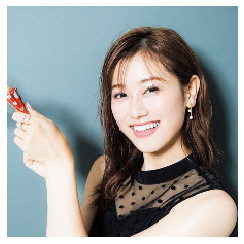

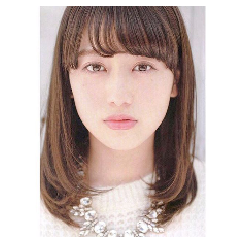

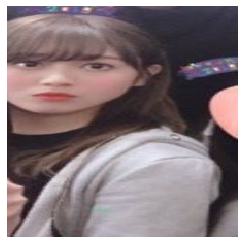

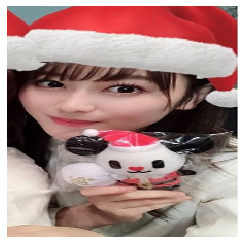

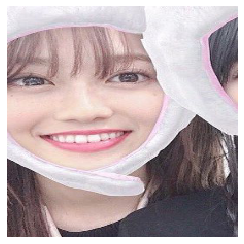

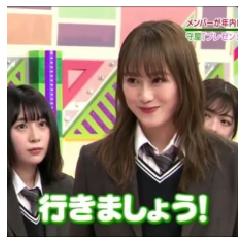

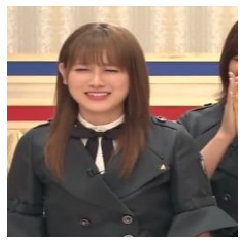

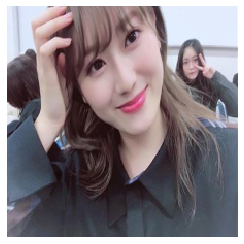

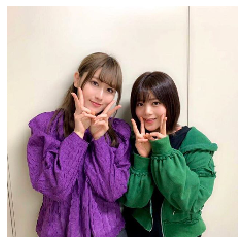

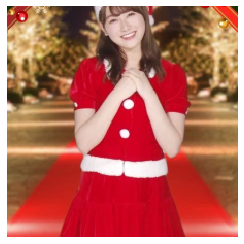

In [11]:
for i in range(10):
    plt.figure(figsize=(50, 50))
    plt.subplot(10, 8, i+1)
    plt.imshow(x_data[i])
    plt.axis('off')
    print(x_data[i].shape)
plt.show()

In [9]:
y_data_list = pd.DataFrame(y_data_list, columns=['label'])
print(y_data_list['label'].value_counts())
uniques = y_data_list['label'].value_counts().index
print(uniques)
counts = y_data_list['label'].value_counts().values
print(counts)

neru     115
yui      114
akane    107
risa     102
rika     100
Name: label, dtype: int64
Index(['neru', 'yui', 'akane', 'risa', 'rika'], dtype='object')
[115 114 107 102 100]


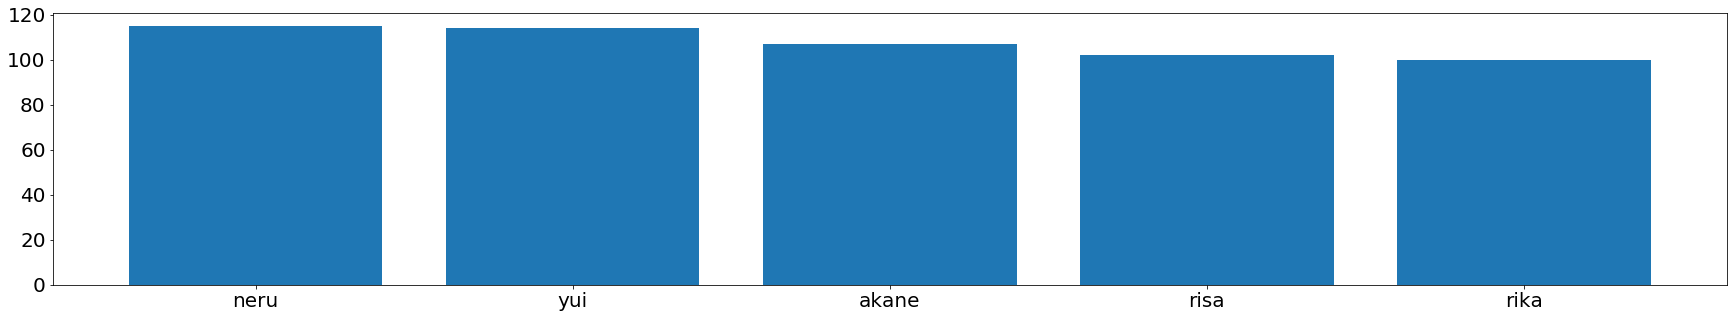

In [10]:
plt.figure(figsize=(30, 5))
plt.bar(uniques, counts)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

In [11]:
class_path = "./classmap.csv"
class_map = pd.read_csv(class_path,header = None, index_col = 0)
class_map

,1
0,
classname,classnum
rika,0
risa,1
yui,2
akane,3
neru,4


In [12]:
class_map = class_map.to_dict()
class_map1 = class_map[1]
class_map1

{'classname': 'classnum',
 'rika': '0',
 'risa': '1',
 'yui': '2',
 'akane': '3',
 'neru': '4'}

In [13]:
y_data = y_data_list['label'].map(class_map1).values.copy() #values.copy 只複製值
y_data

array(['3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3',
       '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3',
       '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3',
       '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3',
       '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3',
       '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3',
       '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3',
       '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3',
       '3', '3', '3', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4',
       '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4',
       '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4',
       '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4',
       '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4',
       '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4

In [14]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=y_data)

In [15]:
y_train.shape

(430,)

In [16]:
print(y_test)


['1' '0' '3' '2' '1' '0' '3' '2' '2' '3' '4' '1' '4' '4' '3' '4' '3' '4'
 '0' '4' '4' '0' '2' '3' '2' '2' '4' '4' '1' '2' '3' '4' '2' '2' '3' '4'
 '4' '1' '2' '2' '1' '3' '3' '0' '2' '2' '2' '1' '0' '1' '2' '0' '4' '2'
 '1' '3' '1' '4' '4' '2' '4' '0' '1' '3' '3' '1' '4' '4' '0' '3' '1' '3'
 '4' '2' '2' '3' '2' '1' '4' '1' '0' '3' '0' '0' '3' '2' '3' '3' '4' '1'
 '0' '0' '2' '4' '1' '0' '0' '2' '0' '1' '0' '3' '4' '0' '1' '1' '3' '0']


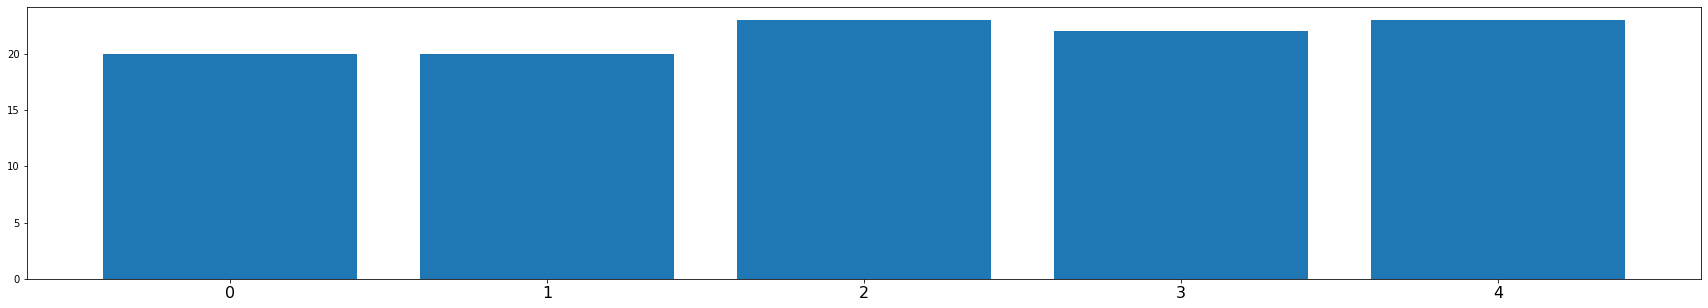

In [17]:
uniques, counts = np.unique(y_test, return_counts=True)

plt.figure(figsize=(30, 5))
plt.bar(uniques, counts)
plt.xticks(fontsize=16)
plt.show()

In [18]:
'''num_classes = len(uniques)
y_train = y_train.astype('int')
y_test =  y_test.astype('int')
y_train = np.eye(num_classes, dtype='float32')[y_train]
y_test = np.eye(num_classes, dtype='float32')[y_test]
print('y_train shape:', y_train.shape)'''

"num_classes = len(uniques)\ny_train = y_train.astype('int')\ny_test =  y_test.astype('int')\ny_train = np.eye(num_classes, dtype='float32')[y_train]\ny_test = np.eye(num_classes, dtype='float32')[y_test]\nprint('y_train shape:', y_train.shape)"

In [19]:
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

Using TensorFlow backend.


In [20]:
num_classes = len(uniques)
y_train[:5]

array([[0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.]], dtype=float32)

In [21]:
y_test[:5]

array([[0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.]], dtype=float32)

In [22]:
from tensorflow.keras.applications.resnet import (ResNet50, preprocess_input)

In [23]:
#x_train = preprocess_input(x_train)
#x_test = preprocess_input(x_test)

In [24]:
x_train[:3] 

array([[[[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [0.8392157 , 0.95686275, 0.9372549 ],
         [0.77254903, 0.90588236, 0.88235295],
         [0.72156864, 0.8745098 , 0.84313726]],

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [0.83137256, 0.9411765 , 0.92156863],
         [0.8235294 , 0.94509804, 0.92941177],
         [0.8156863 , 0.9490196 , 0.9254902 ]],

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [0.8666667 , 0.95686275, 0.94509804],
         [0.85490197, 0.95686275, 0.9411765 ],
         [0.7921569 , 0.9019608 , 0.8862745 ]],

        ...,

        [[0.4862745 , 0.49803922, 0.5647059 ],
         [0.39607844, 0.40784314, 0.4745098 ]

In [25]:
rest_model = ResNet50(
    weights='imagenet', 
    include_top=False, 
    input_shape=(img_size,img_size,3)
)



'''for layer in vgg_model.layers[:-4]:
    layer.trainable=False'''

    
model = Sequential()
 
# Add the vgg convolutional base model
model.add(rest_model)
 
# Add new layers

#model.add(layers.GlobalAveragePooling2D())
#model.add(MaxPooling2D(3, 3))
#model.add(layers.BatchNormalization())
model.add(layers.Flatten())
model.add(layers.Dropout(0.2))
# model.add(layers.Dense(256, activation='relu'))
# model.add(layers.Dropout(0.5))
# model.add(layers.Dense(256, activation='relu'))
# model.add(layers.Dropout(0.2))
model.add(layers.Dense(num_classes, activation='softmax'))

for layer in rest_model.layers[:2]:
    layer.trainable=False

'''for layer in rest_model.layers:
    print(layer, layer.trainable)'''

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 7, 7, 2048)        23587712  
_________________________________________________________________
flatten (Flatten)            (None, 100352)            0         
_________________________________________________________________
dropout (Dropout)            (None, 100352)            0         
_________________________________________________________________
dense (Dense)                (None, 5)                 501765    
Total params: 24,089,477
Trainable params: 24,036,357
Non-trainable params: 53,120
_________________________________________________________________


In [26]:
model_dir = './Model/model-logs'
if not os.path.exists(model_dir):
    os.makedirs(model_dir)

logfiles = model_dir + '/{}-{}'.format('basic_model',
                                       model.__class__.__name__)
model_cbk = keras.callbacks.TensorBoard(log_dir=logfiles,
                                        histogram_freq=1)

modelfiles = model_dir + '/{}-best-model.h5'.format('basic_model')
model_mckp = keras.callbacks.ModelCheckpoint(modelfiles,
                                             monitor='val_accuracy',
                                             save_best_only=True)

earlystop = keras.callbacks.EarlyStopping(monitor='val_loss',
                                          patience=5,
                                          verbose=1)


callbacks_list = [model_cbk, model_mckp, earlystop]

In [27]:
datagen = ImageDataGenerator(
                             #preprocessing_function=preprocess_input,
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             horizontal_flip=True,
                             vertical_flip=False,
                             fill_mode='nearest',
                             cval=0,
                             )




learning_rate = 1e-5
optimizer = keras.optimizers.Adam(lr=learning_rate)#, decay = 5e-8)
batch_size = 25
epochs = 70
num_step = x_train.shape[0] // batch_size


model.compile(loss='categorical_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy'])

In [28]:
 tf.__version__

'2.1.0'

In [29]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [30]:
import tensorflow as tf

gpu_device_name = tf.test.gpu_device_name()
print(gpu_device_name)

/device:GPU:0


In [31]:
history_1 = model.fit_generator(datagen.flow(x_train, y_train,
                                               batch_size=batch_size),
                                  steps_per_epoch=num_step,
                                  epochs=epochs,
                                  validation_data=(x_test, y_test),
                                  #callbacks=callbacks_list
                                 )

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
Train for 17 steps, validate on 108 samples
Epoch 1/70
17/17 [==============================] - 16s 948ms/step - loss: 2.7544 - accuracy: 0.2494 - val_loss: 2.2468 - val_accuracy: 0.1852
Epoch 2/70
17/17 [==============================] - 7s 384ms/step - loss: 2.2753 - accuracy: 0.3432 - val_loss: 2.3517 - val_accuracy: 0.1852
Epoch 3/70
17/17 [==============================] - 7s 387ms/step - loss: 1.9194 - accuracy: 0.4346 - val_loss: 2.2738 - val_accuracy: 0.1852
Epoch 4/70
17/17 [==============================] - 7s 386ms/step - loss: 1.5761 - accuracy: 0.4691 - val_loss: 2.3322 - val_accuracy: 0.1852
Epoch 5/70
17/17 [==============================] - 7s 386ms/step - loss: 1.3761 - accuracy: 0.5383 - val_loss: 2.2305 - val_accuracy: 0.1389
Epoch 6/70
17/17 [==============================] - 7s 385ms/step - loss: 1.2410 - accuracy: 0.5827 - val_loss: 2.2780 - val_accuracy: 0.1574
Ep

In [29]:
y_pred = model.predict(x_test)
y_pred = y_pred.argmax(-1)

In [30]:
class_names = np.array([each for each in class_map.keys()])

In [31]:
from sklearn.metrics import accuracy_score, confusion_matrix

print(accuracy_score(y_test.argmax(-1), y_pred))
print(confusion_matrix(y_test.argmax(-1), y_pred))

0.6203703703703703
[[ 9  4  4  2  1]
 [ 2 18  0  0  0]
 [ 3  0 14  2  4]
 [ 5  2  0 10  5]
 [ 3  3  1  0 16]]


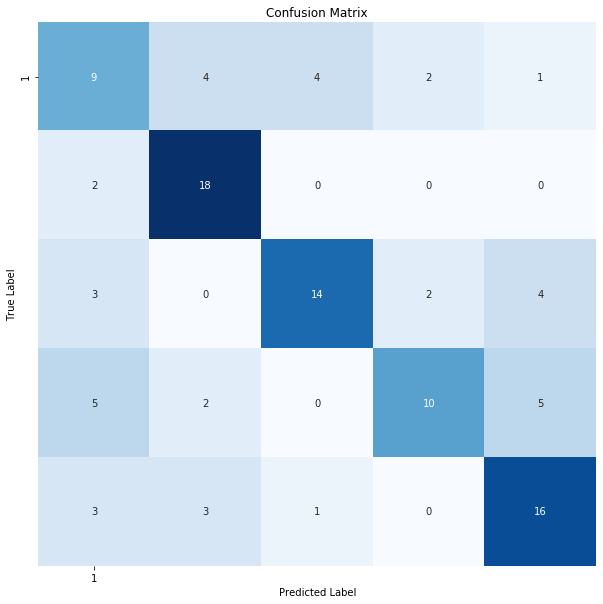

In [32]:
import seaborn as sns

matrix = confusion_matrix(y_test.argmax(-1), y_pred)

plt.figure(figsize=(10, 10))
sns.heatmap(matrix, annot=True, cbar=False, cmap="Blues",
            xticklabels=class_names,
            yticklabels=class_names)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

In [33]:
data_path = './testing_set'

test_data_list = []

for roots, dirs, files in os.walk(data_path):
    #print(roots)
    #print('-----')
    #print(dirs)
    #print('-----')
    #print(files)
    if dirs == []:
        print('null',dirs)
        for each in files:
            #print('every each:',each)
            if each.find('check') == -1:
                test_data_list.append(os.path.join(roots, each))

null []


In [34]:
test_data = load_img(test_data_list)
print(test_data[0])

100%|██████████| 438/438 [00:16<00:00, 26.46it/s]

[[[0.78039217 0.8117647  0.81960785]
  [0.78039217 0.8117647  0.81960785]
  [0.7764706  0.80784315 0.8156863 ]
  ...
  [0.8901961  0.87058824 0.85882354]
  [0.8901961  0.87058824 0.85882354]
  [0.8862745  0.8666667  0.85490197]]

 [[0.7882353  0.8039216  0.80784315]
  [0.78431374 0.80784315 0.80784315]
  [0.7921569  0.8156863  0.8156863 ]
  ...
  [0.89411765 0.8745098  0.8627451 ]
  [0.89411765 0.8745098  0.8627451 ]
  [0.8901961  0.87058824 0.85882354]]

 [[0.8039216  0.8039216  0.80784315]
  [0.8039216  0.80784315 0.8117647 ]
  [0.8        0.8156863  0.8156863 ]
  ...
  [0.8980392  0.8784314  0.8627451 ]
  [0.8980392  0.8745098  0.8627451 ]
  [0.8901961  0.87058824 0.85490197]]

 ...

 [[0.29803923 0.30980393 0.34509805]
  [0.29411766 0.3137255  0.3372549 ]
  [0.32156864 0.34117648 0.3647059 ]
  ...
  [0.30588236 0.32941177 0.3764706 ]
  [0.26666668 0.2901961  0.3372549 ]
  [0.29803923 0.3254902  0.37254903]]

 [[0.43529412 0.4509804  0.4862745 ]
  [0.42352942 0.44313726 0.46666667]


In [35]:
test_title = []
for line in test_data_list :
    line = line[-14:-4]
    test_title.append(line)
    
model.save('./my_model.h5')

In [36]:
#test_data = preprocess_input(test_data)
test_p = model.predict(test_data)
test_p = test_p.argmax(-1) # argmax(-1) 最後一個axis 取出最大值的INDEX
test_p

array([4, 4, 2, 2, 3, 4, 2, 2, 2, 2, 4, 0, 1, 4, 2, 3, 2, 0, 0, 2, 4, 1,
       4, 1, 1, 3, 1, 0, 2, 3, 1, 2, 4, 1, 0, 3, 3, 4, 1, 0, 4, 3, 1, 1,
       3, 1, 4, 4, 1, 1, 0, 1, 1, 2, 4, 2, 1, 4, 3, 3, 3, 4, 3, 3, 0, 0,
       1, 0, 3, 2, 2, 1, 0, 2, 0, 4, 4, 1, 0, 0, 1, 3, 4, 1, 0, 0, 2, 4,
       0, 0, 4, 2, 4, 4, 4, 2, 4, 0, 3, 4, 0, 3, 2, 4, 3, 3, 4, 1, 4, 4,
       0, 0, 3, 1, 2, 0, 2, 3, 4, 1, 1, 3, 2, 2, 3, 1, 0, 1, 2, 2, 2, 4,
       2, 1, 4, 1, 1, 2, 2, 1, 0, 0, 1, 1, 1, 3, 3, 4, 2, 3, 1, 1, 3, 2,
       1, 1, 2, 2, 2, 0, 3, 1, 3, 0, 0, 4, 4, 3, 3, 4, 2, 1, 1, 4, 0, 1,
       3, 0, 4, 0, 3, 0, 0, 0, 3, 0, 0, 1, 2, 0, 1, 3, 3, 0, 4, 1, 3, 2,
       4, 0, 1, 1, 4, 4, 4, 4, 3, 1, 2, 0, 4, 4, 0, 4, 1, 4, 2, 2, 3, 4,
       4, 1, 1, 3, 2, 1, 2, 3, 2, 0, 2, 2, 4, 4, 4, 4, 2, 4, 0, 2, 2, 3,
       4, 1, 0, 4, 3, 1, 1, 2, 0, 2, 3, 2, 4, 3, 1, 0, 0, 1, 3, 2, 3, 3,
       0, 2, 0, 4, 3, 2, 0, 2, 4, 1, 4, 4, 4, 1, 3, 2, 2, 4, 3, 3, 0, 1,
       1, 1, 3, 2, 1, 0, 1, 1, 0, 3, 4, 2, 3, 0, 0,

In [37]:
prd = pd.DataFrame()
prd['id'] = test_title
prd['class'] = test_p
prd.to_csv('./final.csv', index = False)